###

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Import your data and take a look at it
# https://catalog.data.gov/dataset/city-bench-locations-34149
df = pd.read_csv("https://data.cityofnewyork.us/api/views/kuxa-tauh/rows.csv?accessType=DOWNLOAD")
df.head()

,the_geom,BoroCode,BoroName,BoroCD,CounDist,AssemDist,StSenDist,CongDist,SiteID,BenchID,Category,BenchType,Installati,Address,GeocodeAdd,Street,CrossStree,Borough,ComDist,BusRoute,BID,Latitude,Longitude,FEMAFldz,FEMAFldT,HrcEvac
0,POINT (-73.9492765697916 40.71113174228791),3,Brooklyn,301,34,53,18,7,3605,7,BID,backed 2,06/06/2019,561 Grand Street,561 Grand Street,Grand Street,Union Avenue & Lormier Street,Brooklyn,301,Not Applicable,Grand Street,40.711140,-73.949278,X,AREA OF MINIMAL FLOOD HAZARD,5.0
1,POINT (-73.95032656206519 40.826567719130175),1,Manhattan,109,7,71,31,13,3556,0,Bus Route,backless,02/14/2017,3542 Broadway,592 W 145th Street,W 145th Street,W 145th Street & W 146th Street,Manhattan,112,BX19,Not Applicable,40.826576,-73.950328,X,AREA OF MINIMAL FLOOD HAZARD,NaN
2,POINT (-73.9215855696869 40.860835711632895),1,Manhattan,112,10,72,31,13,2331,80,General,backless 2,03/25/2017,3754 10th Avenue,3754 10th Avenue,10th Avenue,201st & 202nd Street,Manhattan,112,M100,Not Applicable,40.860844,-73.921587,AE,NaN,2.0
3,POINT (-73.91915202583036 40.86829148296409),1,Manhattan,112,10,72,31,13,2274,518,General,backless,04/30/2018,4986 Broadway,4986 Broadway,Broadway,W 211th & W 212th Street,Manhattan,112,M100,Not Applicable,40.868291,-73.919152,X,AREA OF MINIMAL FLOOD HAZARD,4.0
4,POINT (-73.89716666711392 40.86236111070519),2,Bronx,205,15,78,33,15,1194,260,BID,backed,10/22/2012,South side Overpass at East Fordham Rd and Gra...,"40°51'44.5""N 73°53'49.8""W",East Fordham Road,Grand Concourse East and West,Bronx,205,Not Applicable,Fordham Road,40.862361,-73.897167,X,AREA OF MINIMAL FLOOD HAZARD,NaN


In [ ]:
# Easy way to see how many rows your data has
print ("Size of Data {}".format(len(df)))

Size of Data 2164


In [ ]:
df['Installati']

0       06/06/2019
1       02/14/2017
2       03/25/2017
3       04/30/2018
4       10/22/2012
           ...    
2159    12/09/2015
2160    07/20/2016
2161    04/28/2016
2162    03/06/2018
2163    07/03/2012
Name: Installati, Length: 2164, dtype: object

In [ ]:
# Turn your "Install Date" into a datetime object so Pandas/Matplotlib can play
# nicely with it.
df['Month'] = pd.to_datetime(df['Installati'])


In [ ]:
df['BoroName'].describe()

count         2164
unique           5
top       Brooklyn
freq           791
Name: BoroName, dtype: object

In [ ]:
# Select a subset of your columns to you don't have so much data to work with
df = df[['BoroName', 'Month', 'BenchID']].copy()
df.head()

,BoroName,Month,BenchID
0,Brooklyn,2019-06-06,7
1,Manhattan,2017-02-14,0
2,Manhattan,2017-03-25,80
3,Manhattan,2018-04-30,518
4,Bronx,2012-10-22,260


In [ ]:
df['Year']=df['Month'].dt.year

In [ ]:
df['Month']=df['Month'].dt.month

In [ ]:
df=df.rename(columns={"BoroName": "Name"})

In [ ]:
df.head()

,Name,Month,BenchID,Year
0,Brooklyn,6.0,7,2019.0
1,Manhattan,2.0,0,2017.0
2,Manhattan,3.0,80,2017.0
3,Manhattan,4.0,518,2018.0
4,Bronx,10.0,260,2012.0


In [ ]:
df_grouped = df.groupby(['Name', 'Month'])['BenchID'].count().reset_index()

In [ ]:
df_grouped.head()

,Name,Month,BenchID
0,Bronx,1.0,26
1,Bronx,2.0,30
2,Bronx,3.0,28
3,Bronx,4.0,8
4,Bronx,5.0,27


In [ ]:
df.loc[df['Name']=='Manhattan']

In [ ]:
import plotly.express as px
#df2 = px.data.gapminder()

fig = px.scatter(df_grouped, x="Month", y="Name",
	         size="BenchID", color="Name",
                  size_max=30)
fig.show()

In [ ]:
df.sort_values(['Year','Month','Name'], inplace=True)

In [ ]:
df_grouped2 = df.groupby(['Name', 'Year'])['BenchID'].count().reset_index()

In [ ]:
import plotly.express as px

fig = px.line(df_grouped2, x="Year", y="BenchID", color='Name')
fig.show()

In [22]:
import seaborn as sns

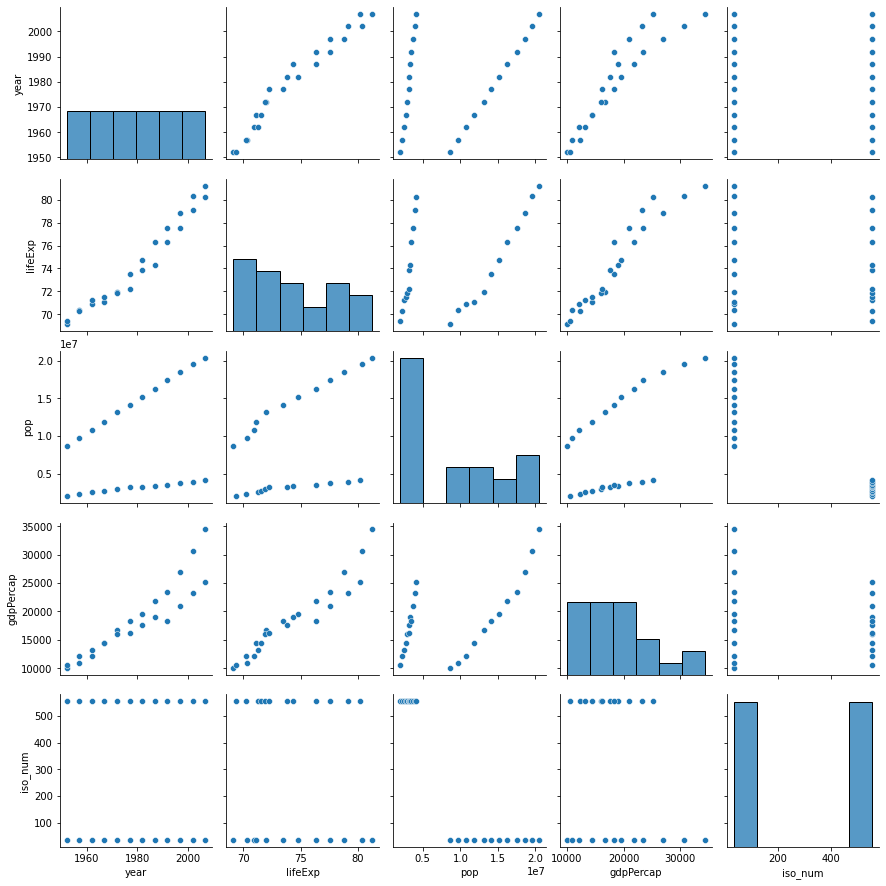

In [25]:
sns.pairplot(df)